# Investigate rotation of masks in healpy
- categories: [healpy,cmb,cosmology]

Investigating a [question about healpy on Stackoverflow](https://stackoverflow.com/questions/68010539/healpy-rotate-a-mask-together-with-the-map-in-hp-ma-vs-separately-produce-di#)

In [1]:
import healpy as hp
import numpy as np
%matplotlib inline

In [2]:
hp.disable_warnings()

In [3]:
nside = 16
npix = hp.nside2npix(nside)

In [4]:
m = hp.ma(np.arange(npix, dtype=np.float32))

In [5]:
mask = np.zeros(npix, dtype=np.bool)
mask[hp.query_strip(nside, np.radians(75), np.radians(105))] = 1
mask[hp.query_disc(nside, hp.dir2vec(0,0, lonlat=True), np.radians(40))] = 1

In [6]:
m.mask = mask

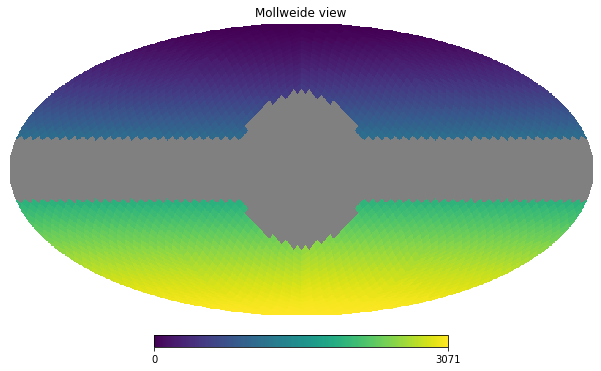

In [7]:
hp.mollview(m);

In [8]:
gal2eq = hp.Rotator(coord=["G","E"])

In [9]:
m_rotated = gal2eq.rotate_map_pixel(m)

In [10]:
mask_rotated = gal2eq.rotate_map_pixel(m.mask)

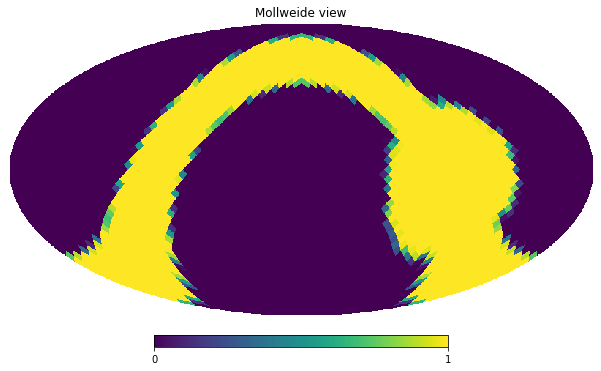

In [11]:
hp.mollview(mask_rotated)

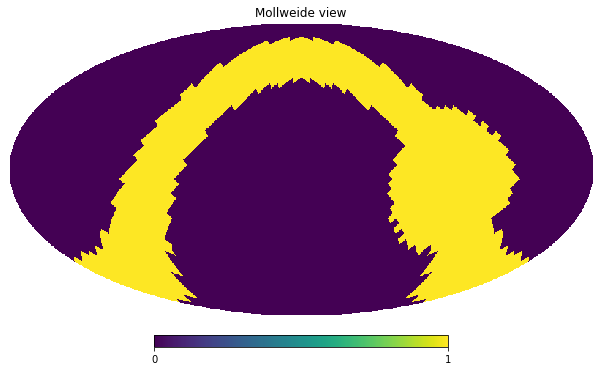

In [12]:
hp.mollview(m_rotated.mask)

Now in the first case `healpy` fills the map with `UNSEEN` and then interpolation is handled by `HEALPix C++`. I don't know how internally HEALPix handles that.
In the second case we pass a map of 0 and 1 and HEALPix does the interpolation, but we don't trigger any special case of handling `UNSEEN` values.

In [13]:
# consider all values less than 1 masked
np.testing.assert_array_equal(m_rotated.mask, mask_rotated == 1)

AssertionError: 
Arrays are not equal

Mismatched elements: 105 / 3072 (3.42%)
 x: array([False, False, False, ..., False, False, False])
 y: array([False, False, False, ..., False, False, False])

In [14]:
# consider only values of 1 masked
np.testing.assert_array_equal(m_rotated.mask, mask_rotated > 0)

AssertionError: 
Arrays are not equal

Mismatched elements: 169 / 3072 (5.5%)
 x: array([False, False, False, ..., False, False, False])
 y: array([False, False, False, ..., False, False, False])

In [15]:
# try a value close to 1
np.testing.assert_array_equal(m_rotated.mask, mask_rotated > .9)

AssertionError: 
Arrays are not equal

Mismatched elements: 26 / 3072 (0.846%)
 x: array([False, False, False, ..., False, False, False])
 y: array([False, False, False, ..., False, False, False])

In [16]:
# try a value close to 1
np.testing.assert_array_equal(m_rotated.mask, mask_rotated > .999)

AssertionError: 
Arrays are not equal

Mismatched elements: 1 / 3072 (0.0326%)
 x: array([False, False, False, ..., False, False, False])
 y: array([False, False, False, ..., False, False, False])

In [17]:
# try a value close to 1
np.testing.assert_array_equal(m_rotated.mask, mask_rotated > .9999)